In [2]:
import pandas as pd
from sklearn.datasets import load_iris, load_digits, load_diabetes
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as stats





In [3]:
iris = load_iris()
digits = load_digits()
diabetes = load_diabetes()
housing = fetch_california_housing(as_frame = True)



In [92]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_digits = pd.DataFrame(digits.data, columns = [f"pixel_{i}" for i in range(digits.data.shape[1])])
df_housing = pd.DataFrame(housing.data, columns = housing.feature_names)
diabetes_df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

#taking three columns from each dataframe for readability
df_iris = df_iris.iloc[:, : 3]
df_digits = df_digits.iloc[:, : 3]
df_housing = df_housing.iloc[:, : 3]
diabetes_df = diabetes_df.iloc[:, : 3]

# converting dataframes into dictionary
dataset = { "iris" : df_iris, "digits": df_digits, "housing" : df_housing, "diabetes" : diabetes_df}
df_mean = pd.Series()
df_median = pd.Series()
df_mode = pd.Series()
df_std = pd.Series()
for key, df in dataset.items():

    df_mean = df_mean.add(df.mean(), fill_value=0)
    df_median = df_median.add(df.median(), fill_value=0)
    mode_values = df.mode().iloc[0]  
    df_mode = df_mode.add(mode_values, fill_value=0)
    df_std = df_std.add(df.std(), fill_value=0)
print(df_mode)

AveRooms                  5.0
HouseAge                 52.0
MedInc                  3.125
age                  0.016281
bmi                 -0.030996
petal length (cm)         1.4
pixel_0                   0.0
pixel_1                   0.0
pixel_2                   0.0
sepal length (cm)         5.0
sepal width (cm)          3.0
sex                 -0.044642
dtype: object


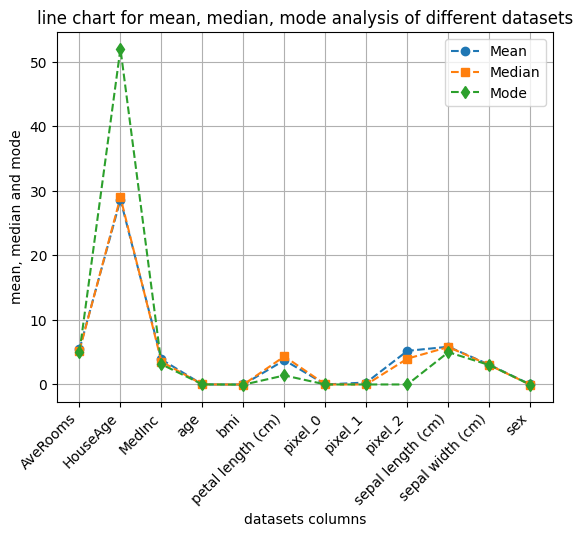

[2.4741731394243187 12.58555761211165 1.8998217179452688
 0.047619047619047644 0.047619047619047616 1.7652982332594662 0.0
 0.9071920952507534 4.754826339660731 0.828066127977863 0.4358662849366982
 0.047619047619047665]


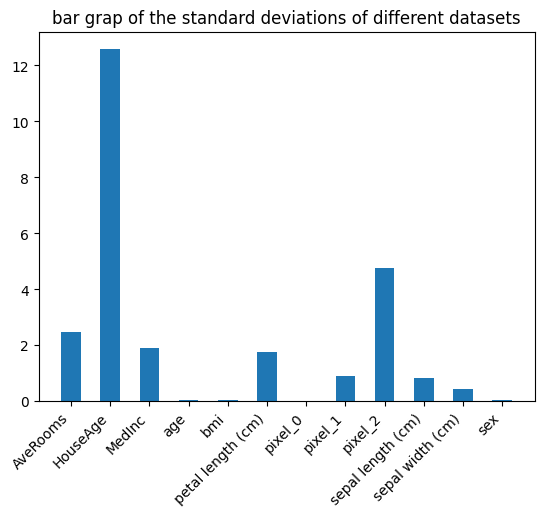

In [97]:
#ploting the line graph for the mean, median and mode of the dataset
plt.plot(df_mean,marker='o', linestyle='--', label="Mean")
plt.plot(df_median,marker='s', linestyle='--', label="Median")
plt.plot(df_mode,marker='d', linestyle='--', label="Mode")
plt.xlabel("datasets columns")
plt.ylabel("mean, median and mode")
plt.title("line chart for mean, median, mode analysis of different datasets")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.show()
print(df_std.values)
plt.bar(df_std.index, df_std.values, width = 0.5)
plt.xticks(rotation=45, ha='right')
plt.title("bar grap of the standard deviations of different datasets")
plt.show()


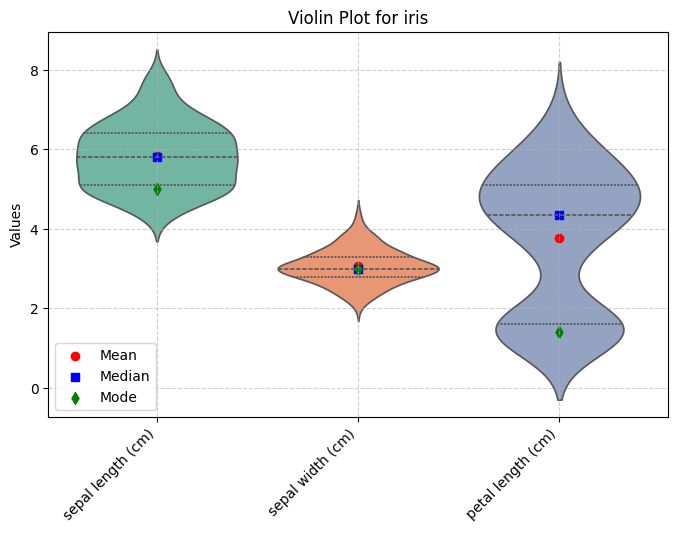

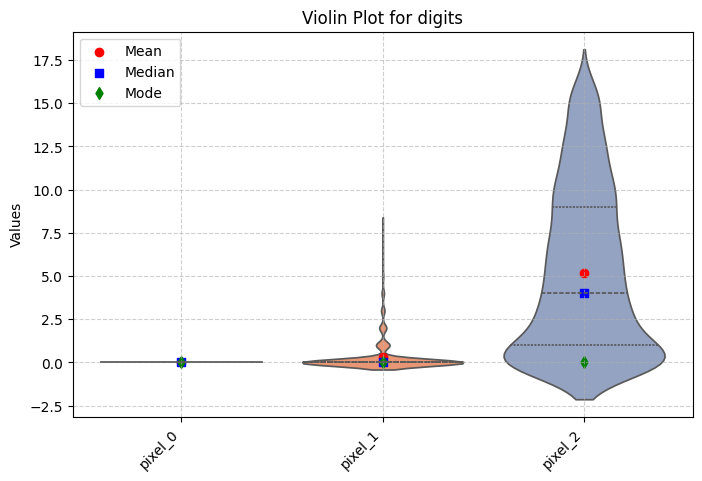

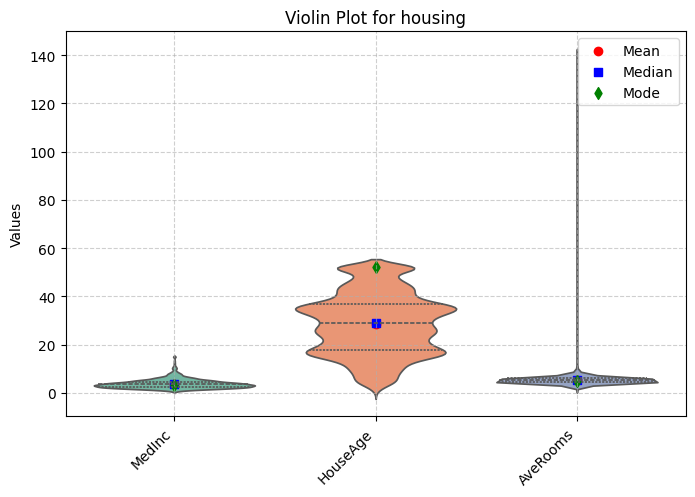

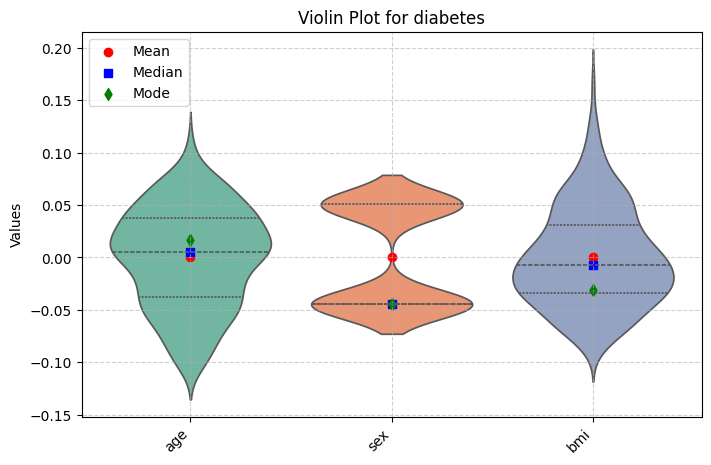

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot violin plot with mean, median, and mode
def plot_violin(df, dataset_name):
    plt.figure(figsize=(8, 5))

    # Violin plot for feature distribution
    sns.violinplot(data=df, inner="quartile", palette="Set2")

    # Overlay mean, median, and mode as scatter points
    mean_values = df.mean()
    median_values = df.median()
    mode_values = df.mode().iloc[0]  # Get first mode in case of multiple
    
    plt.scatter(range(len(df.columns)), mean_values, marker='o', color='red', label="Mean")
    plt.scatter(range(len(df.columns)), median_values, marker='s', color='blue', label="Median")
    plt.scatter(range(len(df.columns)), mode_values, marker='d', color='green', label="Mode")

    # Labels and title
    plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
    plt.ylabel("Values")
    plt.title(f"Violin Plot for {dataset_name}")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Generate violin plots for each dataset
for dataset_name, df in dataset.items():
    plot_violin(df, dataset_name)
